In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:

df_houses = pd.read_csv('house_prices.csv')
df_houses.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:

# Verifico la información contenida en el DF
df_houses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:

#Tenemos demasiadas columnas que no tienen información relevante, voy a seleccionar solo aquellas que contengan datos numéricos y asi poder trabajar sobre ellos
numerics = ['int64', 'float64']
df_houses= df_houses.select_dtypes(include=numerics)
df_houses.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:

# Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
df_houses.shape


Cantidad de datos:


(1460, 38)

In [6]:

#Como parte de la limpieza, revisaré si el DF contiene datos nulos 
df_houses.isnull().sum()


Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [7]:

#Mostraré el contenido de esta columna para evaluar que hacer con los datos nulos
df_houses.loc[:,'LotFrontage']


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [8]:

#Y esta otra
df_houses.loc[:,'GarageYrBlt']


0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [9]:

#No voy a eliminar las columnas ya que podrían ser datos de utilidad, en su lugar voy a reemplazarlos con 0
df_houses.fillna(value=0, inplace=True)
#Y mostramos el resultado
df_houses.isnull().sum()


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Estudio de Datos

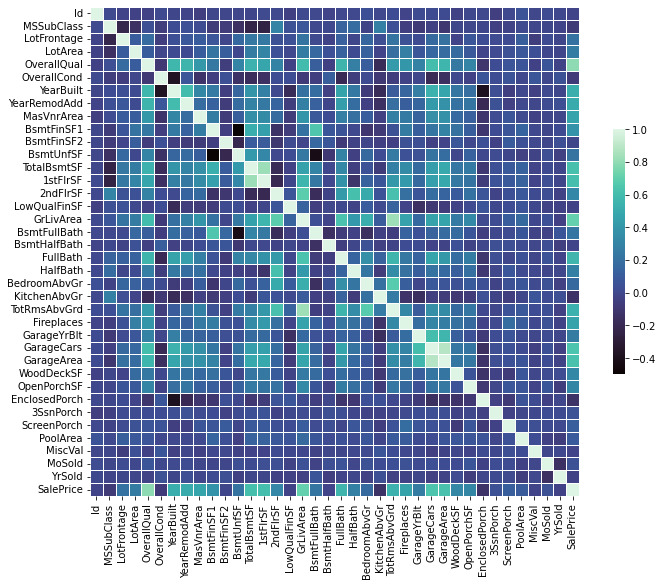

In [10]:

corr = df_houses.corr()
#El mapa de calor nos muestra que variables están mas relacionadas con el Target, en base a eso entrenaremos el modelo
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, cmap='mako', square=True, linewidths=.5, cbar_kws={"shrink": .5});


# Procesamiento de Datos

In [11]:

#Definimos las características
x = df_houses[['OverallQual','TotRmsAbvGrd','GarageCars']] #entrada
#Indicamos la etiqueta
y = df_houses['SalePrice'] #salida


# Visualización del Conjunto de Datos

In [12]:

#plt.scatter(x,y,color='blue')
#plt.title('Regresión Lineal')
#plt.xlabel('GarageCars')
#plt.ylabel('SalePrice')
#plt.show()


NOTA: Podemos prescindir del grafico ya que le estamos dando mayor poder al algoritmo utilizando dos variables, además si quisieramos plotearlo deberíamos utilizar un mapa 3D

# División de Datos

In [13]:

#Voy a dividir los datos en entrenamiento y prueba, esto me permitirá probar los algoritmos
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)


# Creación del Modelo

In [14]:

#Creamos
lr = LinearRegression()
#Ajustamos
lr.fit(x_train,y_train)


LinearRegression()

# Predicción del conjunto de Datos de Prueba

In [15]:

y_pred = lr.predict(x_test)


# Validación de Resultados

In [16]:

df_resultados= pd.DataFrame(columns=['Valor_Real','Valor_Predicho'])
df_resultados['Valor_Real'] = y_test
df_resultados['Valor_Predicho'] = y_pred
df_resultados['Diferencia'] = abs(df_resultados['Valor_Predicho'] - df_resultados['Valor_Real'])
df_resultados.head()


,Valor_Real,Valor_Predicho,Diferencia
529,200624,209369.709141,8745.709141
491,133000,141998.304121,8998.304121
459,110000,110444.561714,444.561714
279,192000,230613.568705,38613.568705
655,88000,152308.186966,64308.186966


In [17]:

#plt.scatter(x_test, y_test, color='blue')
#plt.plot(x_test,y_pred,color='red')
#plt.title('Regresión Lineal')
#plt.xlabel('OverallQual')
#plt.ylabel('SalePrice')
#plt.show()


NOTA: Esta gráfica tampoco va a salir 

# Métricas

In [18]:


print("Raíz error cuadrático medio: %.2f" % np.sqrt(mean_squared_error(y_test,y_pred)))
print("Coeficiente de determinación: %.2f" % r2_score(y_test,y_pred))


Raíz error cuadrático medio: 47247.74
Coeficiente de determinación: 0.68


# Conclusión:


Tenemos un Error Cuadrático algo mayor de lo esperado, el modelo puede que no sea bueno del todo, pero podría funcionar ya que el r2, con las variables de entrada seleccionadas, es el resultado más próximo a 1 que he logrado. 
